* Name: Mundru Srinidhi Krishna
* Roll Number: 12040930
* References Used to Complete the Assignment
    * a.https://www.kaggle.com/code/rameshrallapalli/nyc-taxi-fare-prediction
    * b. gfg and towards data science
    * c. https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6

...


# Part 1: NY Taxi Fare Prediction

In [222]:
!pip install -q kaggle

In [223]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"srinidhikrishna","key":"bdcd7e374d94f12d6bc1e43cf9b6bbde"}'}

In [224]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [225]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [226]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [227]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [228]:
train_df = pd.read_csv("/content/train.csv", nrows = 1000000)
test_df = pd.read_csv("/content/test.csv")

PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [229]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [230]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train_df.shape)

# See all the columns in the dataset
print("All columns are :", list(train_df.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [231]:
# Check datatypes & count of not-null values in each field
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [232]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [233]:
#check for missing values in train data
print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64


In [234]:
#check for missing values in test data
test_df.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [235]:
#drop the missing values
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 1000000
New size: 999990


In [236]:
#check the target column


In [237]:
#Look for no. of non-positive fare_amount values.
from collections import Counter
Counter(train_df['fare_amount']<0)

Counter({False: 999952, True: 38})

In [238]:
# Remove the non-positive fare_amount values.(Fare amount has a negative value, which doesn't make sense. Remove these fields)
train_df = train_df.drop(train_df[train_df['fare_amount']<0].index, axis=0)
train_df.shape
train_df['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [239]:
#Remove outliers
train_df['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [240]:
#208 passengers cant be possible 
train_df[train_df['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [241]:
#drop it as it is a outliner. Now data contains maximum of six passengers
train_df = train_df.drop(train_df[train_df['passenger_count']==208].index, axis = 0)

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


In [242]:
#We need to drop these outliers
train_df = train_df.drop(((train_df[train_df['pickup_latitude']<-90])).index, axis=0)
train_df = train_df.drop(((train_df[train_df['pickup_latitude']>90])).index, axis=0)


In [243]:
train_df.shape #12 rows dropped

(999939, 8)

In [244]:
train_df = train_df.drop(((train_df[train_df['pickup_longitude']<-180])).index, axis=0)
train_df = train_df.drop(((train_df[train_df['pickup_longitude']>180])).index, axis=0)

In [245]:
train_df.shape #8 rows dropped

(999928, 8)

In [246]:
train_df = train_df.drop(((train_df[train_df['dropoff_latitude']<-90])).index, axis=0)
train_df = train_df.drop(((train_df[train_df['dropoff_latitude']>90])).index, axis=0)
train_df.shape #8 rows dropped

(999920, 8)

In [247]:
train_df[train_df['dropoff_longitude']<-180]
train_df[train_df['dropoff_longitude']>180] #no outliners

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [248]:
#pickup latitude and longitude = 0
train_df.loc[((train_df['pickup_latitude']==0) & (train_df['pickup_longitude']==0))&((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
897211,2015-04-08 00:47:30.0000001,0.0,2015-04-08 00:47:30 UTC,0.0,0.0,-73.937698,40.758118,1


In [249]:
train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']==0) & (train_df['pickup_longitude']==0))&((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)].index, axis=0)

In [250]:
test_df.loc[((test_df['pickup_latitude']==0) & (test_df['pickup_longitude']==0))&((test_df['dropoff_latitude']!=0) & (test_df['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [251]:
train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']!=0) & (train_df['pickup_longitude']!=0))&((train_df['dropoff_latitude']==0) & (train_df['dropoff_longitude']==0)) & (train_df['fare_amount']==0)].index, axis=0)

In [252]:
test_df.loc[((test_df['pickup_latitude']!=0) & (test_df['pickup_longitude']!=0))&((test_df['dropoff_latitude']==0) & (test_df['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Check the data types of each column

In [253]:
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [254]:
train_df['key'] = pd.to_datetime(train_df['key'])
train_df['pickup_datetime']  = pd.to_datetime(train_df['pickup_datetime'])

In [255]:
#Convert for test data
test_df['key'] = pd.to_datetime(test_df['key'])
test_df['pickup_datetime']  = pd.to_datetime(test_df['pickup_datetime'])

In [256]:
#check the dtypes after conversion
train_df.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [257]:
test_df.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [258]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train_df, test_df]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [259]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [260]:
high_distance = train_df.loc[(train_df['H_Distance']>200)&(train_df['fare_amount']!=0)]
high_distance.shape

(1938, 9)

Now we shall check for rows where the distance values are 0


In [261]:
train_df[train_df['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0
...,...,...,...,...,...,...,...,...,...
999888,2010-04-28 21:08:00.000000380,9.3,2010-04-28 21:08:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0
999915,2014-05-12 02:34:05.000000100,8.0,2014-05-12 02:34:05+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0
999931,2012-03-05 22:22:00.000000181,6.9,2012-03-05 22:22:00+00:00,-73.970005,40.713008,-73.970005,40.713008,5,0.0
999988,2011-05-14 07:21:00.000000140,25.3,2011-05-14 07:21:00+00:00,-73.937393,40.757975,-73.937393,40.757975,5,0.0



Case 1: Fare and Distance are both 0. i shall del these as we no info

In [262]:
train_df[(train_df['H_Distance']==0)&(train_df['fare_amount']==0)].shape

(4, 9)

In [263]:
train_df = train_df.drop(train_df[(train_df['H_Distance']==0)&(train_df['fare_amount']==0)].index, axis = 0)

Case 2: Fare is not 0 and is less than the base amount, but Distance is 0.

Case 3: Fare is 0, but Distance is not 0. These values need to be imputed.

In [264]:
case3 = train_df.loc[(train_df['H_Distance']!=0) & (train_df['fare_amount']==0)]

In [265]:
case3['fare_amount'] = case3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [266]:
train_df.update(case3)

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [267]:
data = [train_df,test_df]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [268]:
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010,3,9,1,7


# Data Visualization


**1. Does the number of passengers affect the fare?**

Text(0, 0.5, 'Frequency')

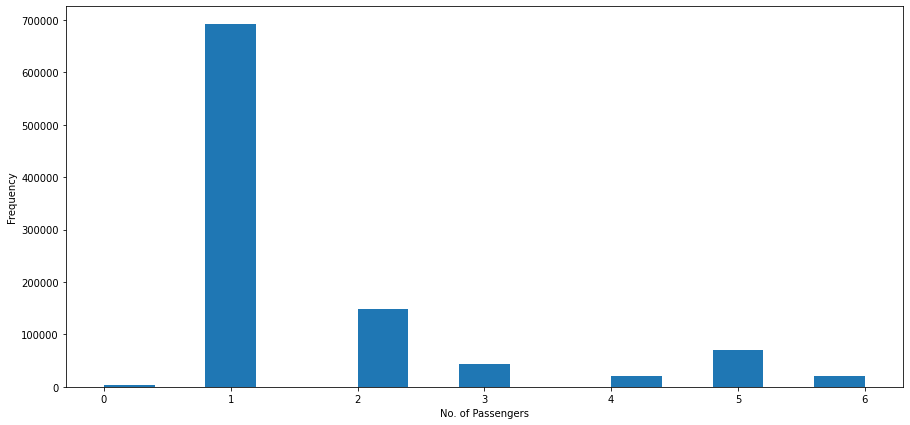

In [269]:
plt.figure(figsize=(15,7))
plt.hist(train_df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

**2. Does the date and time of pickup affect the fare?**

Text(0, 0.5, 'Fare')

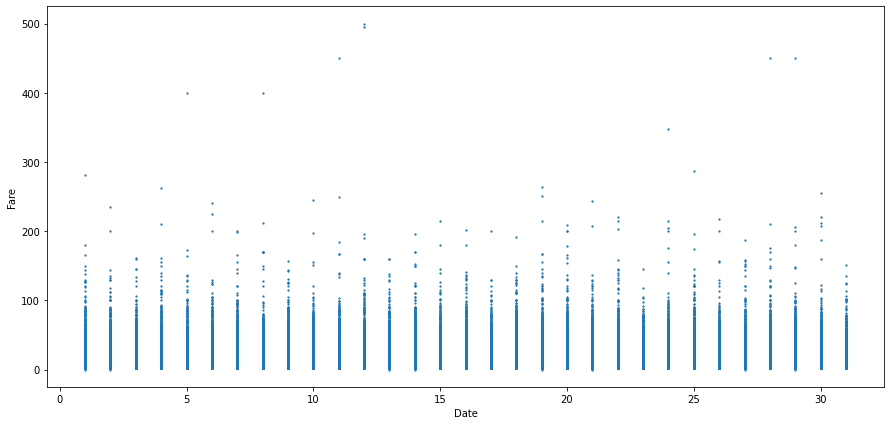

In [270]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Date'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

**3. Does the day of the week affect the fare?**

Text(0, 0.5, 'Frequency')

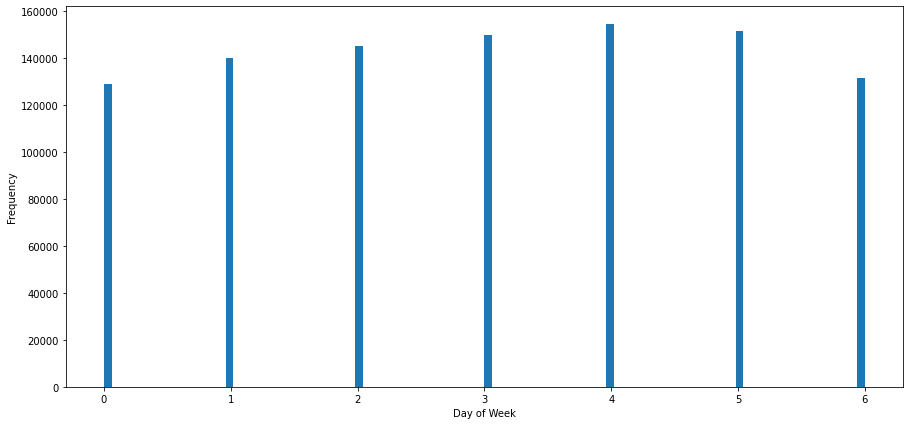

In [271]:
plt.figure(figsize=(15,7))
plt.hist(train_df['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

**4. Does the distance affect the fare?**

Yes

# Looking for Correlations

 compute the standard correlation
coecient (also called Pearson’s r) between every pair of attributes using the corr()
method

In [272]:
corr_matrix = train_df.corr()

In [273]:
# Lets see the most correlated features to "fare_amount"
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
Year                 0.115909
H_Distance           0.025106
Month                0.025028
passenger_count      0.013093
dropoff_longitude    0.010154
pickup_longitude     0.009690
Day of Week          0.002696
Date                 0.001432
pickup_latitude     -0.009093
dropoff_latitude    -0.010334
Hour                -0.018948
Name: fare_amount, dtype: float64

We can visualize the correlation using the 2D plotting of every pair-wise feature.

In [274]:
# import seaborn as sns
# attributes = ['fare_amount', 'pickup_longitude',
#        'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
#        'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour',
#        'H_Distance']
# sns.pairplot(train_df[attributes], plot_kws={"s": 3})
# plt.show()


In [275]:
tr_df=train_df.drop(['key','pickup_datetime'],axis=1)

# Scaling 

In [276]:
# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

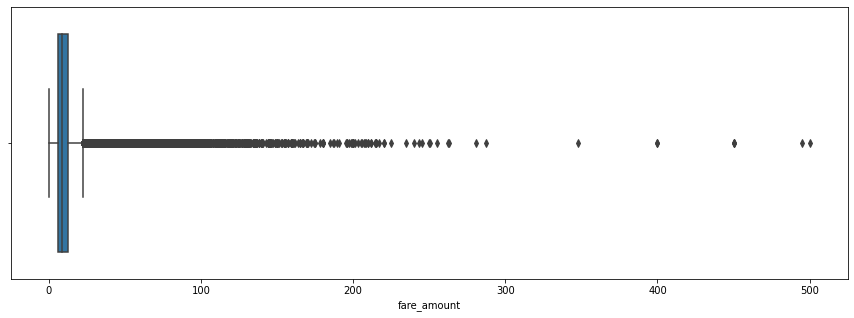

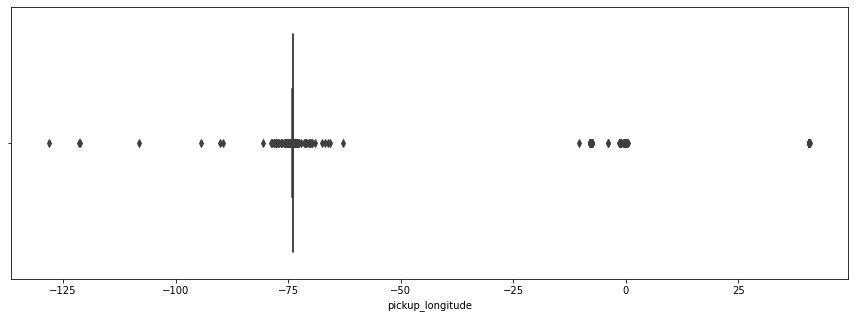

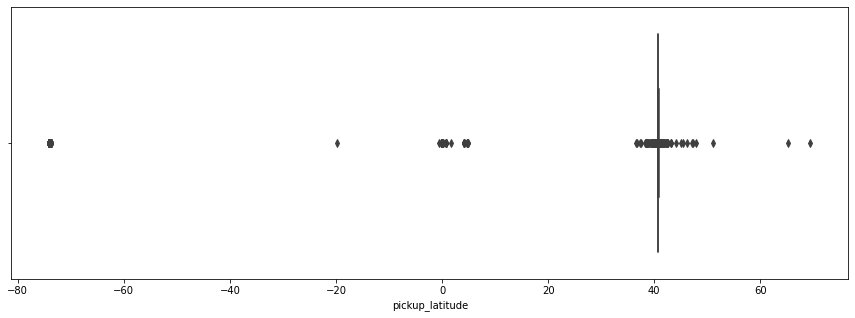

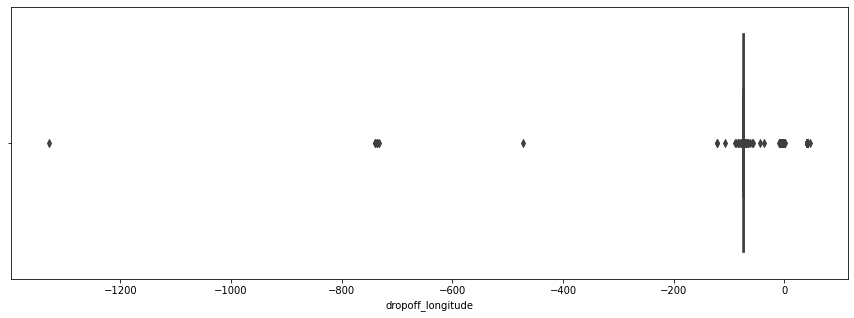

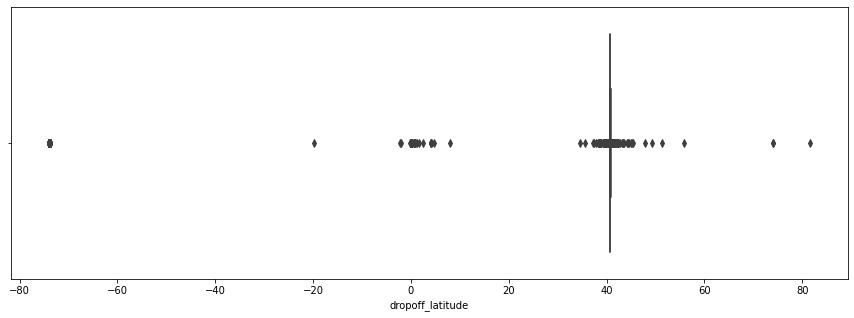

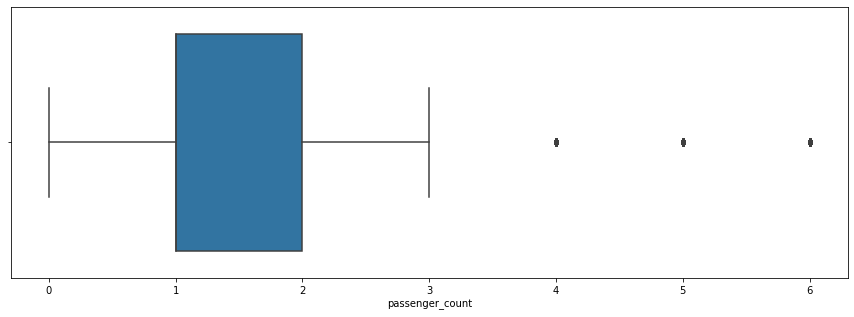

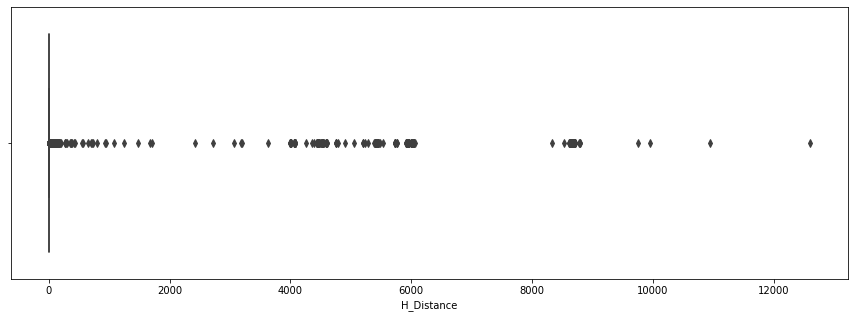

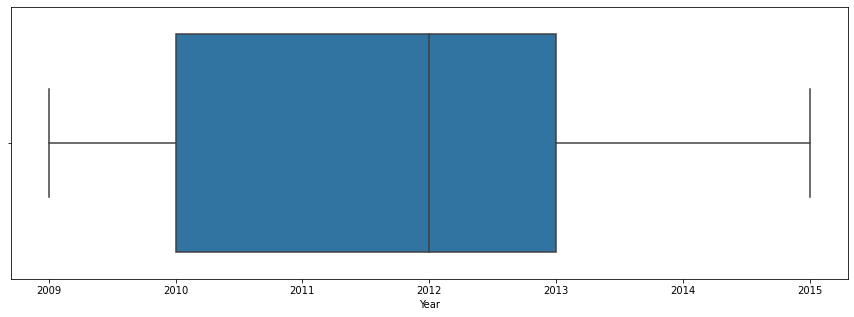

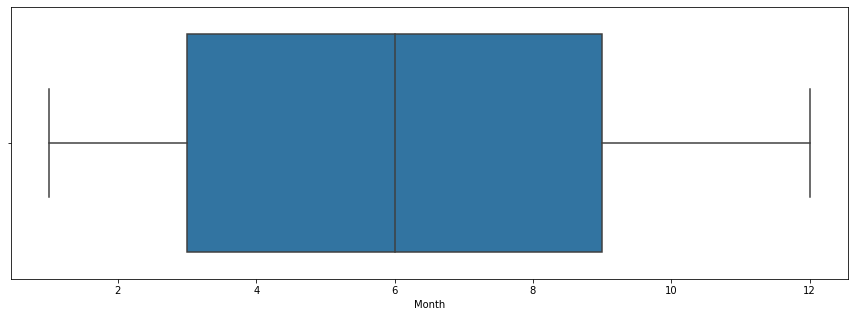

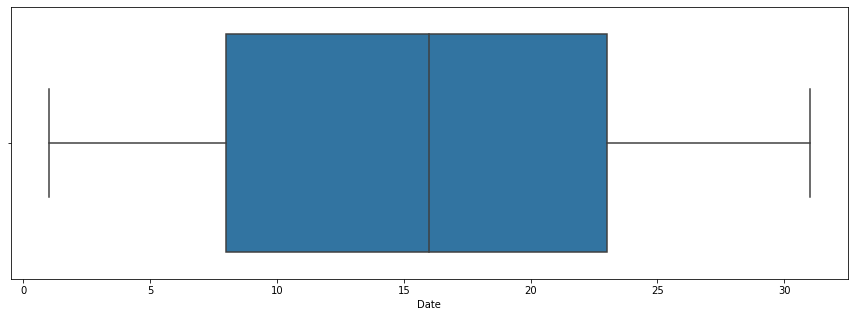

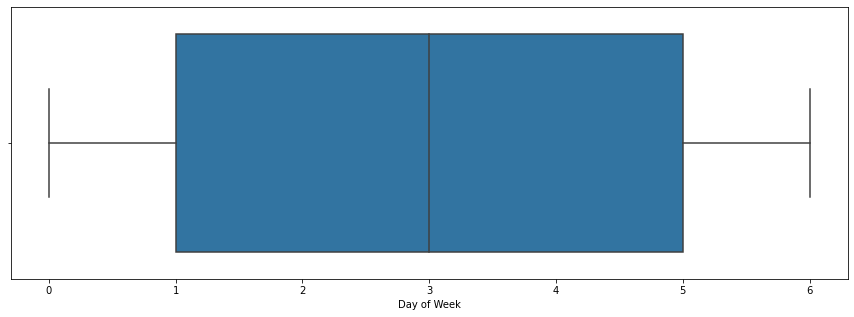

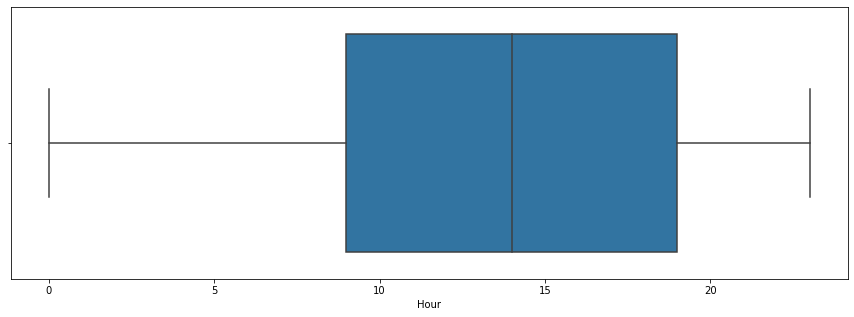

In [277]:
list_columns=list(tr_df.columns)
def boxplot(b):
  fig,ax=plt.subplots(figsize=(15,5))
  sns.boxplot(x=b,data=train_df)
  plt.xlabel(b)
  plt.show()
for i in list_columns:
  boxplot(i)

In [278]:
# scaler = MinMaxScaler()
# scaler.fit(tr_df)
# scaled_data = scaler.transform(tr_df)

In [279]:
#Removing Outliers
def outliers(data,column,a):
    for x in column:
        iqr = data[x].quantile(0.75) - data[x].quantile(0.25)
        upper_boundary = data[x].quantile(0.75) + (a*iqr)
        lower_boundary = data[x].quantile(0.25) - (a*iqr)
        data = data[(data[x] < upper_boundary) & (data[x] > lower_boundary)]
    return data
train_df = outliers(train_df, ['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Day of Week', 'Hour', 'H_Distance'],4.5)

In [280]:
#Normalization 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x=train_df.drop(['key', 'fare_amount', 'pickup_datetime','pickup_longitude', 'pickup_latitude',
         'dropoff_longitude', 'dropoff_latitude'],axis=1)
y=train_df['fare_amount']

nor = StandardScaler()
for i in x.columns:
    a = np.array(x[i]).reshape(-1,1)
    nor.fit(a)
    x[i] = nor.transform(a).reshape(1,-1)[0]



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [285]:
#train_df = pd.DataFrame(scaled_data, columns = ['fare_amount', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour','H_Distance'])

In [286]:
#test_df = test_df.drop(['key','pickup_datetime'], axis = 1)

In [288]:
#train_prep= train_df.drop(['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],axis = 1)

In [289]:
# train_labels=train_df['fare_amount'].copy()
# train_labels_n = train_df['fare_amount'].values
# train_labels_n=train_labels_n.reshape(999912,1)
# train_labels_n.shape

In [290]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
# Here, by calling .fit(), we are calculating parameters of the model only
linear_model.fit(x_train,y_train)

LinearRegression()

In [291]:
y_pred = linear_model.predict(x_test)
linear_model.score(x_test,y_test)

0.6343330555999966

# Pipeline


In [292]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='median'))
      ,('scaler', StandardScaler())])
numeric_features=list(x.columns)
numeric_features
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)])

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])
model = pipeline.fit(x_train, y_train)


In [293]:
from sklearn.metrics import r2_score
p = model.predict(x_test)
print (r2_score(y_test, p))

0.6343330555999966


In [294]:
# from sklearn.base import BaseEstimator, TransformerMixin
# class fill_median(BaseEstimator, TransformerMixin):
#     # Taking which column to modify as "col" parameter
#     def __init__(self, col):
#         self.col = col
    
#     # Fit just calculated the median value and stores it as class variable
#     def fit(self, X, y=None):
#         self.median = X[self.col].median()
#         return self
    
#     # Transform updates all NaN values with median
#     def transform(self, X):
#         return X.fillna(self.median)

In [295]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # This is the main pipeline object, in which we are performing four tasks
# # pipeline takes list of tuples of two values as (name of transform, transform object)
# pre_pipe = Pipeline([
#     ('fillna', fill_median(col='passenger_count')),
#     # StandardScaler is very common scaling function. It makes every feature of dataset
#     # having mean = 0 and std = 1
#     ('Standard_scaling', StandardScaler())
# ])

# # we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# # Later it also transforms the input data as per the "transform()" definition of each object
# train_prepared = pre_pipe.fit_transform(train_prep)
# train_prepared

# Linear Regression

In [296]:

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
# Here, by calling .fit(), we are calculating parameters of the model only
linear_model.fit(x_train,y_train)

LinearRegression()

In [297]:
y_pred = linear_model.predict(x_test)
linear_model.score(x_test,y_test)

0.6343330555999966

In [298]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_pred = linear_model.predict(x_train)

linear_rmse = mean_squared_error(y_train, train_pred, squared=False)
linear_mae = mean_absolute_error(y_train, train_pred)

print("Root Mean Squared Error of Linear Model :", linear_rmse)
print("Mean Absolute Error of Linear Model :", linear_mae)

Root Mean Squared Error of Linear Model : 4.073223218940932
Mean Absolute Error of Linear Model : 2.125087838155945


Gradient Descent in Linear Regression 

In [299]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [300]:
gdx = x_train["H_Distance"]
gdy = y_train

In [301]:
clf = GradientDescentLinearRegression()
clf.fit(gdx,gdy)


In [302]:
clf.m # here we got more accuracy

5.595996820104862

Matrix Based:

In [303]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_train.T, x_train)), x_train.T), y_train)
print(w_OLS) 

0    0.049648
1    5.576068
2    0.869049
3    0.227231
4    0.007014
5   -0.106687
6    0.079339
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


# Use of Validation Set and Cross Validation Approach

In [304]:
train_kf = train_df.drop(['key', 'pickup_datetime','pickup_longitude', 'pickup_latitude',
         'dropoff_longitude', 'dropoff_latitude'], axis = 1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946237 entries, 1 to 999999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                946237 non-null  datetime64[ns]     
 1   fare_amount        946237 non-null  float64            
 2   pickup_datetime    946237 non-null  datetime64[ns, UTC]
 3   pickup_longitude   946237 non-null  float64            
 4   pickup_latitude    946237 non-null  float64            
 5   dropoff_longitude  946237 non-null  float64            
 6   dropoff_latitude   946237 non-null  float64            
 7   passenger_count    946237 non-null  float64            
 8   H_Distance         946237 non-null  float64            
 9   Year               946237 non-null  int64              
 10  Month              946237 non-null  int64              
 11  Date               946237 non-null  int64              
 12  Day of Week        946237 non-

In [305]:
train_kf.drop(train_kf.tail(2).index,inplace = True)

In [306]:
x = len(train_kf)
z = x//10
print(x)

946235


In [307]:
#Dividing training data in 10 sets and in each iteration selecting one set from one on those and rest are concatenated using pd.concat. adn runnig the iteration 10 times

train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10=(train_kf[0:z],train_kf[z:2*z],train_kf[2*z:3*z],train_kf[3*z:4*z],train_kf[4*z:5*z],train_kf[5*z:6*z],train_kf[6*z:7*z],train_kf[7*z:8*z],train_kf[8*z:9*z],train_kf[9*z:10*z-1])
train_list=[train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10]


In [308]:

s=[]


In [ ]:
for i in range(0,10):
  tl=[train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10]
  tl.pop(i)
  train_set = pd.concat(tl)
  x_cross_train=train_set.drop("fare_amount", axis="columns")
  y_cross_train=train_set['fare_amount']
  test_set = train_list[i]
  x_cross_test=test_set.drop('fare_amount',axis="columns")
  y_cross_test=test_set['fare_amount']
  lr=LinearRegression()
  lr.fit(x_cross_train,y_cross_train)
  prediction=lr.predict(x_cross_test)
  s.append(lr.score(x_cross_test,y_cross_test))

In [ ]:
print(max(s))